In [1]:
# Python
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_excel('Total_final.xlsx', index_col='TS', parse_dates=True, dtype={'Value':float})

In [3]:
df.drop(['Unnamed: 0','Unnamed: 0.1', 'Time', 'Max Value','Date'], axis=1, inplace=True)

In [4]:
df.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [5]:
df.describe()

,y
count,33503.000000
mean,816.119398
std,34.713666
min,500.700000
25%,797.400000
50%,820.200000
75%,840.000000
max,923.700000


In [6]:
df_day=df.resample(rule='D').sum()
df_day=df_day.reset_index()
#df_day.columns
df_day.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [7]:
df_day.tail()

,ds,y
344,2020-09-09,77844.9
345,2020-09-10,78377.4
346,2020-09-11,76560.6
347,2020-09-12,76635.9
348,2020-09-13,75723.9


In [8]:
df_day.drop(df_day.index[336], inplace=True)

In [9]:
df_day.tail()

,ds,y
344,2020-09-09,77844.9
345,2020-09-10,78377.4
346,2020-09-11,76560.6
347,2020-09-12,76635.9
348,2020-09-13,75723.9


In [11]:
m = Prophet(yearly_seasonality=True,daily_seasonality=True)
m.fit(df_day)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [12]:
future = m.make_future_dataframe(30, freq='D') # Forecasting 7 days
future.tail()

,ds
373,2020-10-09
374,2020-10-10
375,2020-10-11
376,2020-10-12
377,2020-10-13


In [20]:
future = m.make_future_dataframe(10, freq='D') # Forecasting 7 days
future.tail()

,ds
353,2020-09-19
354,2020-09-20
355,2020-09-21
356,2020-09-22
357,2020-09-23


In [21]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
353,2020-09-19,75515.129687,73884.107629,76990.380001
354,2020-09-20,75378.934810,73745.856456,76878.987793
355,2020-09-21,75265.610353,73739.343339,76773.998166
356,2020-09-22,75447.384374,73917.175822,76961.385784
357,2020-09-23,75516.887784,74093.788245,77092.922817


In [23]:
future14 = m.make_future_dataframe(14, freq='D') # Forecasting 7 days
future14.tail()

,ds
357,2020-09-23
358,2020-09-24
359,2020-09-25
360,2020-09-26
361,2020-09-27


In [24]:
forecast = m.predict(future14)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
357,2020-09-23,75516.887784,73920.340433,77038.816110
358,2020-09-24,75456.043496,73997.327662,77038.265507
359,2020-09-25,75321.434067,73794.665314,76752.050056
360,2020-09-26,75206.997947,73647.362347,76735.603906
361,2020-09-27,75136.781141,73668.984194,76762.190650


In [25]:
future100 = m.make_future_dataframe(100, freq='D') # Forecasting 7 days
forecast100 = m.predict(future100)
forecast100[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
443,2020-12-18,78820.429941,77208.882363,80387.492145
444,2020-12-19,78791.413105,77197.938530,80295.059514
445,2020-12-20,78784.785100,77319.198668,80253.535249
446,2020-12-21,78775.788515,77252.401586,80346.419936
447,2020-12-22,79035.780784,77462.081058,80608.325404


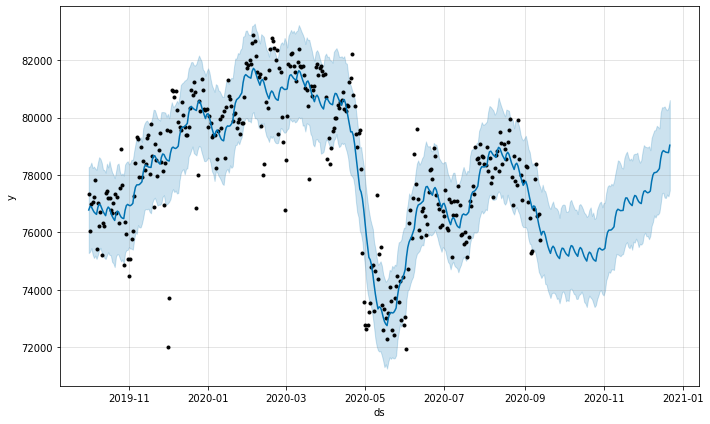

In [26]:
fig100 = m.plot(forecast100)

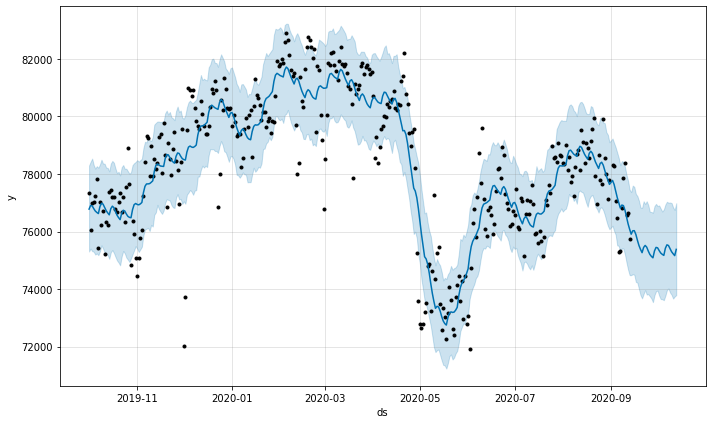

In [14]:
fig1 = m.plot(forecast)

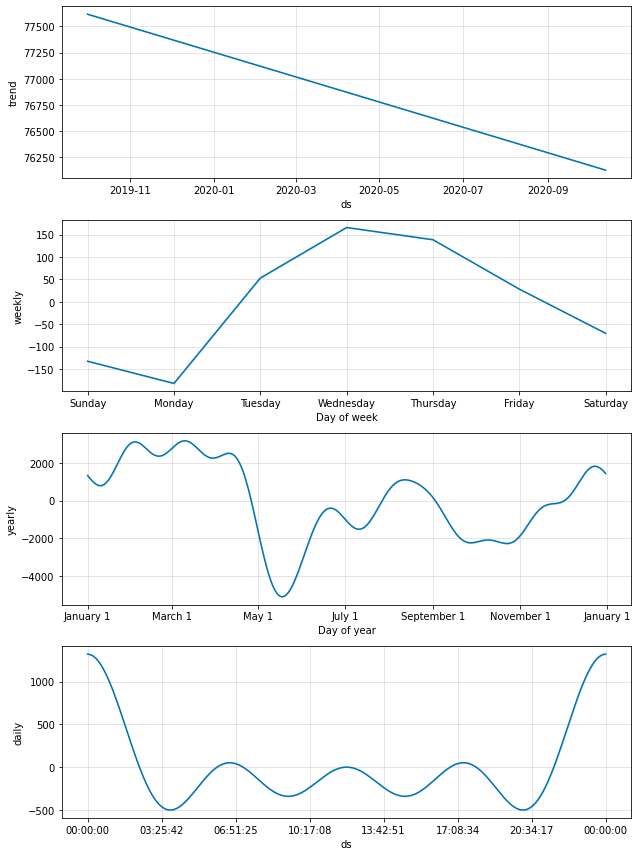

In [15]:
fig2 = m.plot_components(forecast)

In [16]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

Output hidden; open in https://colab.research.google.com to view.

In [17]:
fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)